In [432]:
#Importing libraries
import numpy as np
from sklearn.model_selection import cross_validate, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [433]:
# Loading Dataset
copd = pd.read_csv("/Users/anjalivardhan/Desktop/copd.csv")

In [434]:
copd.head()

,id,Question 1,Question 2,Question 3,Question 4,Question 5,Question 6,Question 7,Question 8,Question 9,Question 10
0,1,5,1,1,1,2,1,3,1,1,1
1,2,5,4,4,5,7,10,3,2,1,2
2,3,3,1,1,1,2,2,3,1,1,1
3,4,6,8,8,1,3,4,3,7,1,2
4,5,4,1,1,3,2,1,3,1,1,1


In [435]:
copd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 11 columns):
id             700 non-null int64
Question 1     700 non-null int64
Question 2     700 non-null int64
Question 3     700 non-null int64
Question 4     700 non-null int64
Question 5     700 non-null int64
Question 6     700 non-null object
Question 7     700 non-null int64
Question 8     700 non-null int64
Question 9     700 non-null int64
Question 10    700 non-null int64
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


In [436]:
# Preprocessing the data
copd.replace('?',np.nan, inplace=True)

print(copd.axes)

copd.drop(['id'], 1, inplace=True)

[RangeIndex(start=0, stop=700, step=1), Index(['id', 'Question 1', 'Question 2', 'Question 3', 'Question 4',
       'Question 5', 'Question 6', 'Question 7', 'Question 8', 'Question 9',
       'Question 10'],
      dtype='object')]


In [437]:
# Let explore the dataset and do a few visualizations
print(copd.loc[10])

# Print the shape of the dataset
print(copd.shape)

Question 1     1
Question 2     1
Question 3     1
Question 4     1
Question 5     1
Question 6     1
Question 7     3
Question 8     1
Question 9     1
Question 10    2
Name: 10, dtype: object
(700, 10)


In [438]:
copd['Question 6'] = copd['Question 6'].astype(float)

In [439]:
# Describe the dataset
print(copd.describe())

       Question 1  Question 2  Question 3  Question 4  Question 5  Question 6  \
count  700.000000  700.000000  700.000000  700.000000  700.000000  684.000000   
mean     4.412857    3.135714    3.205714    2.811429    3.215714    3.543860   
std      2.816690    3.049451    2.970137    2.855887    2.212730    3.641248   
min      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   
25%      2.000000    1.000000    1.000000    1.000000    2.000000    1.000000   
50%      4.000000    1.000000    1.000000    1.000000    2.000000    1.000000   
75%      6.000000    5.000000    5.000000    4.000000    4.000000    6.000000   
max     10.000000   10.000000   10.000000   10.000000   10.000000   10.000000   

       Question 7  Question 8  Question 9  Question 10  
count  700.000000  700.000000  700.000000   700.000000  
mean     3.444286    2.864286    1.588571     2.658571  
std      2.442713    3.052265    1.713995     0.965350  
min      1.000000    1.000000    1.000000 

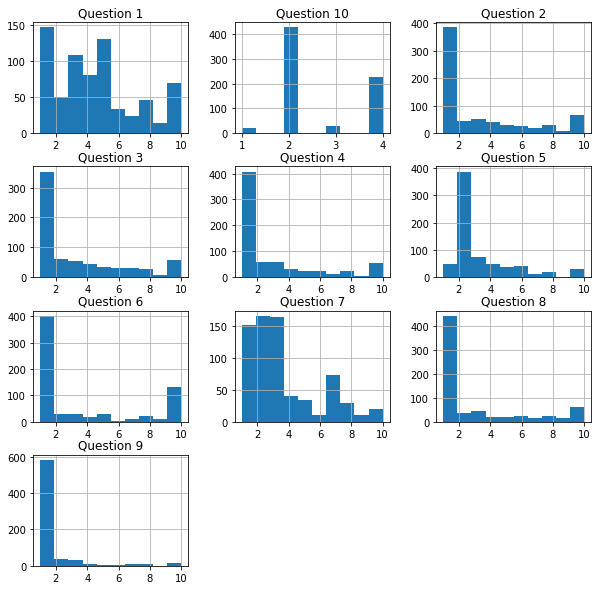

None


In [440]:
# Plotting histograms for each question
copd.hist(figsize = (10, 10))
print(plt.show())

In [441]:
print(copd.groupby('Question 10').size())

Question 10
1     20
2    426
3     27
4    227
dtype: int64


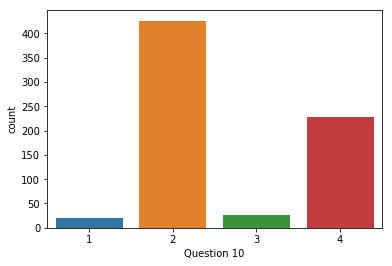

In [442]:
sns.countplot(copd['Question 10'],label="Count")

In [443]:
copd.fillna(copd['Question 6'].mode()[0], inplace=True)
np.isnan(copd).any()

Question 1     False
Question 2     False
Question 3     False
Question 4     False
Question 5     False
Question 6     False
Question 7     False
Question 8     False
Question 9     False
Question 10    False
dtype: bool

In [444]:
seed = 9

# Create X and Y datasets for training
X = np.array(copd.drop(['Question 10'], 1))
y = np.array(copd['Question 10'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

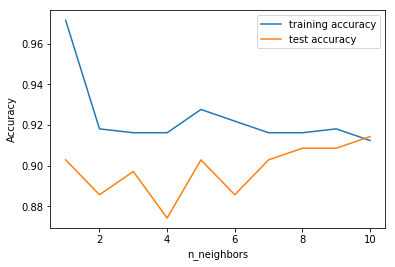

In [445]:
X_train, X_test, y_train, y_test = train_test_split(copd.loc[:, copd.columns != 'Question 10'], copd['Question 10'], stratify=copd['Question 10'], random_state=50)
from sklearn.neighbors import KNeighborsClassifier
training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 10
neighbors_settings = range(1, 11)
for n_neighbors in neighbors_settings:
    # build the model
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(knn.score(X_train, y_train))
    # record test set accuracy
    test_accuracy.append(knn.score(X_test, y_test))
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()


In [446]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'.format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'.format(knn.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 0.93
Accuracy of K-NN classifier on test set: 0.90


In [447]:
scoring = 'accuracy'

# Define models to train
models = []
models.append(('KNN', KNeighborsClassifier(n_neighbors = 5)))
models.append(('SVM', SVC()))

# evaluate each model in turn
results = []
names = []

for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state = seed)
    cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f" % (name, cv_results.mean())
    print(msg)

KNN: 0.901161
SVM: 0.893614


/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default 

In [448]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)
svc = SVC()
svc.fit(X_train_scaled, y_train)
print("Accuracy on training set: {:.2f}".format(svc.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.2f}".format(svc.score(X_test_scaled, y_test)))

Accuracy on training set: 0.91
Accuracy on test set: 0.90


/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [449]:
# Making predictions on validation dataset

for name, model in models:
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    print(name)
    print(accuracy_score(y_test, predictions))
    print(classification_report(y_test, predictions))
    
# Accuracy is the ratio of correctly predicted observation to the total observations. 
# Precision is (false positives) ratio of correctly predicted positive observations to the total predicted positive observations
# Recall is (Sensitivity) - (false negatives) ratio of correctly predicted positive observations to the all observations in actual class - yes.
# F1 score is the weighted average of Precision and Recall. So, then this score takes both false positives and false

KNN
0.9028571428571428
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         5
           2       0.90      0.97      0.94       106
           3       0.00      0.00      0.00         7
           4       0.90      0.96      0.93        57

   micro avg       0.90      0.90      0.90       175
   macro avg       0.45      0.48      0.47       175
weighted avg       0.84      0.90      0.87       175

SVM
0.9028571428571428
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         5
           2       0.91      0.96      0.94       106
           3       0.00      0.00      0.00         7
           4       0.89      0.98      0.93        57

   micro avg       0.90      0.90      0.90       175
   macro avg       0.45      0.49      0.47       175
weighted avg       0.84      0.90      0.87       175



/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.

In [450]:
clf = SVC()

clf.fit(X_train, y_train)
accuracy = clf.score(X_test, y_test)
print(accuracy)

example_measures = np.array([[4,2,1,1,1,2,3,2,1]])
example_measures = example_measures.reshape(len(example_measures), -1)
prediction = clf.predict(example_measures)
print(prediction)

0.9028571428571428
[2]


/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
